<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files


In [2]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv
Saving sign_mnist_test.csv to sign_mnist_test.csv


(7172,)

In [160]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
  with open(filename) as training_file:
    reader=csv.reader(training_file)
    images=[]
    labels=[]
    for x,row in enumerate(reader):
      if x==0:
        pass
      else:
        holder=np.array(row[1:],dtype=float)
        labels.append(float(row[0]))
        images.append(np.array_split(holder,28))
        

    labels=np.array(labels,dtype=float)
    images=np.array(images)        
    return images,labels  



training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
training_images=np.expand_dims(training_images,axis=3)

In [162]:
training_images.shape

(27455, 28, 28, 1)

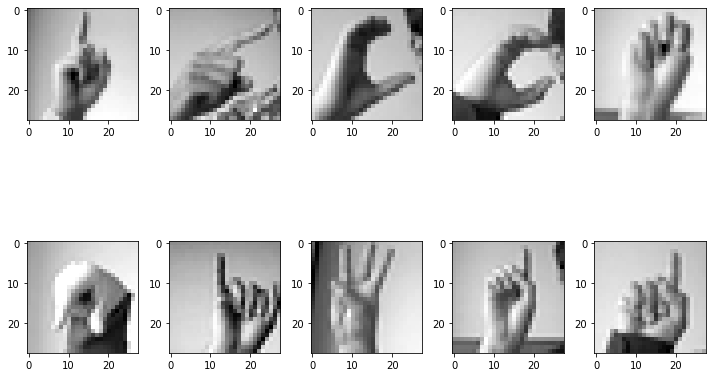

In [163]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()    

In [0]:
testing_images=np.expand_dims(testing_images,axis=3)

In [165]:
testing_images.shape

(7172, 28, 28, 1)

In [166]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      fill_mode='nearest'
    
)

train_datagen.fit(training_images)

validation_datagen = ImageDataGenerator(rescale=1/255.0)
validation_datagen.fit(testing_images)    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

training_labels = label_binarizer.fit_transform(training_labels)
testing_labels = label_binarizer.fit_transform(testing_labels)

In [188]:
training_labels.shape

(27455, 24)

(27455, 1)

(7172, 1)

In [0]:
train_generator = train_datagen.flow(training_images,training_labels,batch_size=95)

validation_generator = validation_datagen.flow(testing_images,testing_labels,batch_size=44)

In [190]:
train_generator

In [0]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D

In [193]:
model = tf.keras.models.Sequential()

model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 75)        750       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 7, 7, 25)          11275     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 4, 4, 25)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 400)             

In [195]:

history = model.fit_generator(train_generator, epochs=20,validation_data = validation_generator, verbose = 1)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]

Epoch 1/20
289/289 [==============================] - 71s 247ms/step - loss: 1.4079 - accuracy: 0.5556 - val_loss: 0.4288 - val_accuracy: 0.8645
Epoch 2/20
289/289 [==============================] - 71s 246ms/step - loss: 0.4804 - accuracy: 0.8383 - val_loss: 0.2004 - val_accuracy: 0.9525
Epoch 3/20
289/289 [==============================] - 71s 247ms/step - loss: 0.2544 - accuracy: 0.9152 - val_loss: 0.1146 - val_accuracy: 0.9629
Epoch 4/20
289/289 [==============================] - 73s 251ms/step - loss: 0.1565 - accuracy: 0.9497 - val_loss: 0.0777 - val_accuracy: 0.9741
Epoch 5/20
289/289 [==============================] - 73s 253ms/step - loss: 0.1184 - accuracy: 0.9619 - val_loss: 0.0691 - val_accuracy: 0.9784
Epoch 6/20
289/289 [==============================] - 77s 266ms/step - loss: 0.0801 - accuracy: 0.9737 - val_loss: 0.0374 - val_accuracy: 0.9873
Epoch 7/20
289/289 [==============================] - 73s 252ms/step - loss: 0.0695 - accuracy: 0.9780 - val_loss: 0.0408 - val_ac

[6.92426086682151, 0.56609035]

In [196]:
# history = model.fit_generator(train_generator, epochs=25,validation_data = validation_generator, verbose = 1)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]

225/225 [==============================] - 5s 22ms/step - loss: 12.4698 - accuracy: 0.9767


[12.469827651977539, 0.9767150282859802]

In [0]:
# training_labels=np.expand_dims(training_labels,axis=1)
# testing_labels=np.expand_dims(testing_labels,axis=1)